[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fisamz/Repositorio_MCDAA/blob/main/Tarea4/Tarea4.ipynb)

# Tarea 4 — Selección de características  
**Alumno:** Fisam Zavala  
**Dataset:** Mental Health and Lifestyle Habits (2019–2024)  
**Fuente:** [Kaggle – Atharva Soundankar](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


### Selección de características con SelectKBest

Para determinar qué variables tienen mayor relación con la variable objetivo **`Happiness Score`**, se aplicó el método **SelectKBest** con la métrica **f_regression**, que evalúa la fuerza de la relación lineal entre cada predictor y la variable dependiente.


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

data = df.copy()
data["Mental Health Condition"] = data["Mental Health Condition"].fillna("None")

# y = objetivo
y = data["Happiness Score"].astype(float)

# X = predictores numéricos (one-hot para toda columna categórica)
X = pd.get_dummies(
    data.drop(columns=["Happiness Score", "Country"]),
    drop_first=True  # evita colinealidad perfecta
).astype(float)

# SelectKBest con f_regression
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)

# Tabla ordenada de importancia (F-score) y p-values
feature_scores = (
    pd.DataFrame({
        "Feature": X.columns,
        "Score": selector.scores_,
        "p_value": selector.pvalues_
    })
    .sort_values("Score", ascending=False)
    .reset_index(drop=True)
)

feature_scores 


,Feature,Score,p_value
0,Diet Type_Vegetarian,8.206406,0.004203
1,Social Interaction Score,4.861364,0.027540
2,Exercise Level_Low,2.683357,0.101507
3,Gender_Male,1.407339,0.235593
4,Diet Type_Vegan,1.262625,0.261245
5,Sleep Hours,0.906755,0.341054
6,Screen Time per Day (Hours),0.845425,0.357924
7,Stress Level_Moderate,0.805390,0.369559
8,Age,0.754521,0.385118
9,Mental Health Condition_Bipolar,0.633370,0.426185


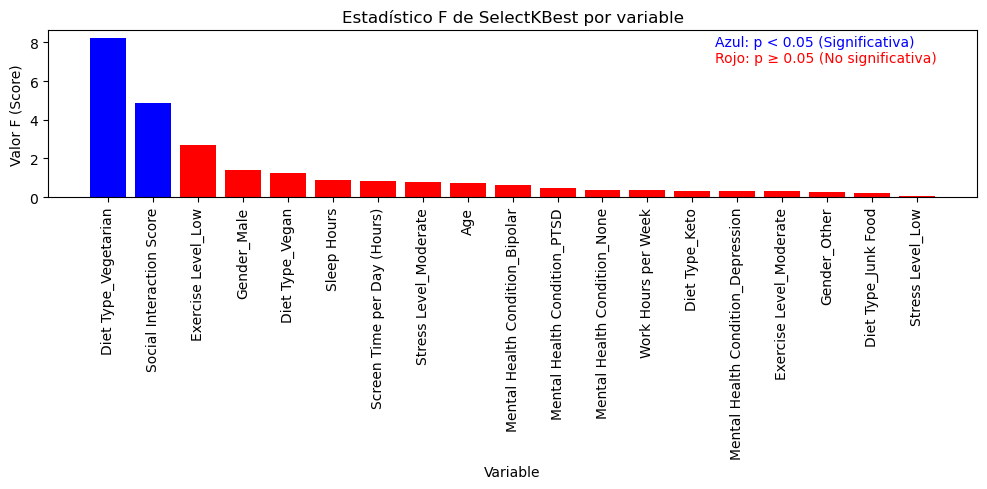

In [ ]:
import matplotlib.pyplot as plt

# Ordenar por Score (opcional)
feature_scores = feature_scores.sort_values(by="Score", ascending=False)

# Definir colores: azul si p < 0.05, rojo en caso contrario
colors = ["blue" if p < 0.05 else "red" for p in feature_scores["p_value"]]

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.bar(feature_scores["Feature"], feature_scores["Score"], color=colors)
plt.xticks(rotation=90)
plt.title("Estadístico F de SelectKBest por variable")
plt.xlabel("Variable")
plt.ylabel("Valor F (Score)")

# Agregar leyenda manual
plt.text(13.5, max(feature_scores["Score"]) * 0.95, "Azul: p < 0.05 (Significativa)", color="blue")
plt.text(13.5, max(feature_scores["Score"]) * 0.85, "Rojo: p ≥ 0.05 (No significativa)", color="red")

plt.tight_layout()
plt.show()
